# Exercício 7 da folha 8
## 3º ano de Licenciatura em Engenharia Física
### Universidade do Minho
Catarina Oliveira (a92831) e Diogo Gomes (a92848)

## Enunciado do exercício:

7. É frequente os cometas terem órbitas muito excêntricas à volta do sol.
Durante a maior parte do tempo deslocam-se lentamente fora do sistema
solar mas quando passam perto do sol deslocam-se com velocidades maiores:


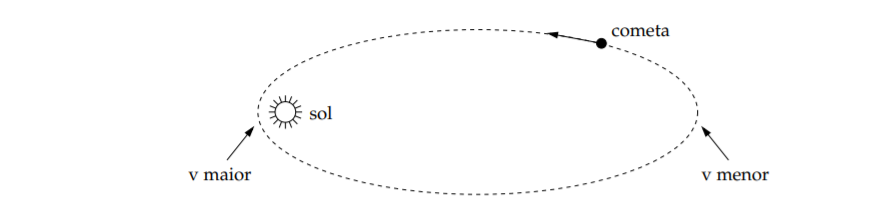

A equação diferencial que define o movimento do cometa pode ser facilmente obtida. A força entre o sol, com massa M, e o cometa com massa m
é GMm/r^2
, sendo r o vetor posição. De acordo com a segunda Lei de Newton, temos então que:


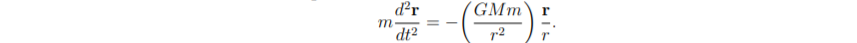

Como a órbita está definida num plano podemos, sem perda de generalidade, ignorar uma das coordenadas orientando o sistema de eixos de
forma a que este plano seja perpendicular a z, ficando então com duas
equações diferenciais de segunda ordem:

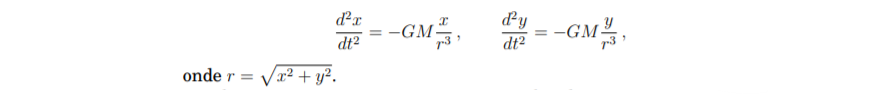

Resolva estas equações numericamente, sabendo que M = 1, 989×10^30 kg
e G = 6, 67 × 10^−11 Nm^2kg^−2
. Como condição inicial, assuma que o cometa está inicialmente em x = 4 mil milhões de quilómetros e y = 0, o
que corresponde a uma posição perto da órbita de Neptuno, tendo como
velocidade inicial vx = 0 e vy = 500 m s^−1
. Represente a trajetória (i.e.
um gráfico da posição x em função da posição y), bem como o gráfico do
módulo da velocidade em função do tempo, escolhento um tempo total
suficientemente grande para se visualizarem algumas órbitas completas. Discuta os resultados obtidos.

In [ ]:
import numpy as np
from pylab import plot,xlabel,ylabel,show,figure,title

#Constantes do exercício
G=6.6738*10**(-11)
M=1.9891*10**30

def acel(r_,t):
    x=r_[0]
    y=r_[1]
    vx=r_[2]
    vy=r_[3]
    r=np.sqrt(x**2 +y**2)
    ax=-G*M*x/r**3
    ay=-G*M*y/r**3
    return np.array([vx,vy,ax,ay],float)

def rk4(tf): #tf tempo final da trajetória (em segundos)
    ti=0
    N=150000 #Quanto maior N, menor o h e mais precisas são as trajetórias
    h=(tf-ti)/N 
    xi=4*10**12 
    yi=vxi=0
    vyi=v=500 
    xp=[]
    yp=[]
    vxp=[]
    vyp=[]
    r=np.array([xi,yi,vxi,vyi],float)
    t_list=np.arange(ti,tf,h) 
    for t in t_list:
        xp.append(r[0])
        yp.append(r[1])
        vxp.append(r[2])
        vyp.append(r[3])
        k1=h*acel(r,t)
        k2=h*acel(r+0.5*k1,t+0.5*h)
        k3=h*acel(r+0.5*k2,t+0.5*h)
        k4=h*acel(r+k3,t+0.5*h)
        r+=(k1+2*k2+2*k3+k4)/6      
    return [xp,yp,vxp,vyp,t_list]

traj1=rk4(24*365*60*60*48) #trajetória para 48 anos
traj2=rk4(24*365*60*60*49) #trajetória para 49 anos (volta praticamente completa)
traj3=rk4(24*365*60*60*50) #trajetória para 50 anos
traj=rk4(24*365*60*60*200) #trajetória para 200 anos

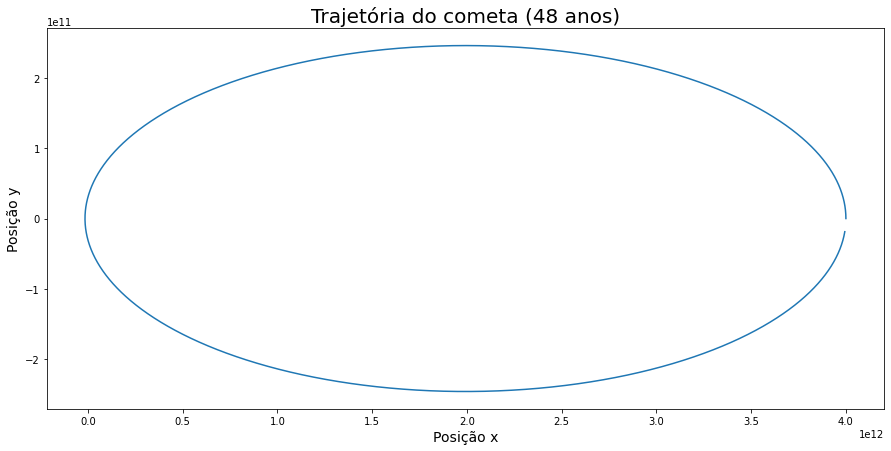

In [ ]:
figure(figsize=[15,7])
plot(traj1[0],traj1[1])
xlabel('Posição x', fontsize=14)
ylabel('Posição y', fontsize=14)
title('Trajetória do cometa (48 anos)', fontsize=20)
show()

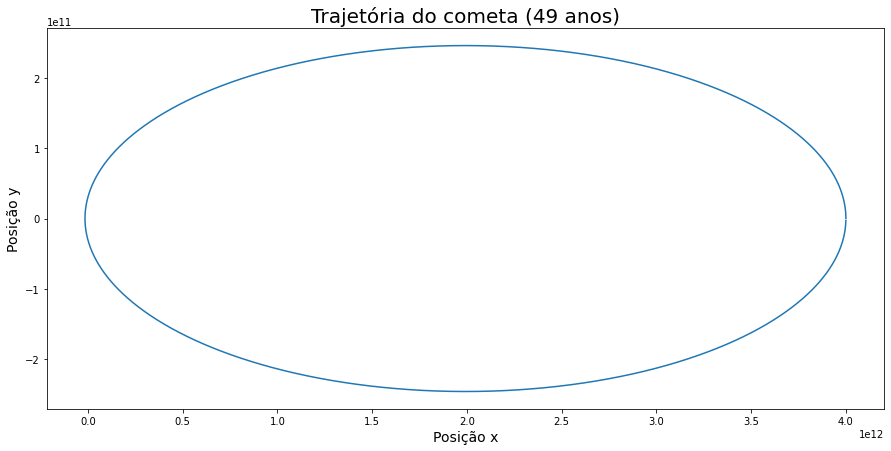

In [ ]:
figure(figsize=[15,7])
plot(traj2[0],traj2[1])
xlabel('Posição x', fontsize=14)
ylabel('Posição y', fontsize=14)
title('Trajetória do cometa (49 anos)', fontsize=20)
show()

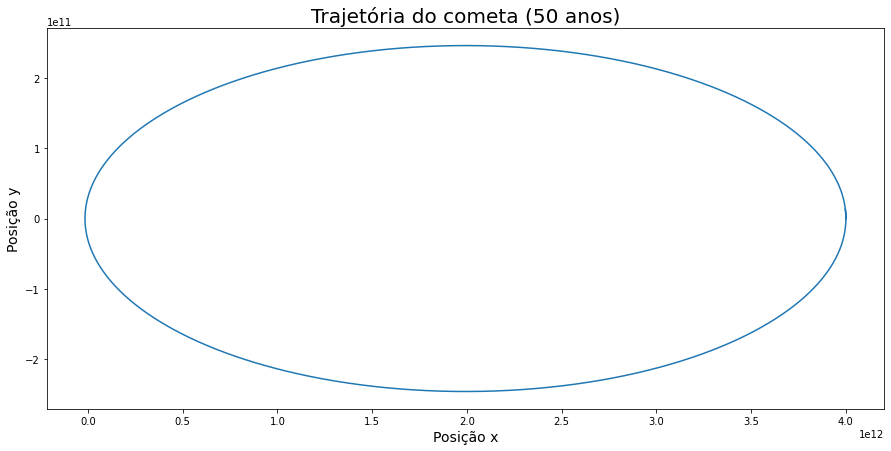

In [ ]:
figure(figsize=[15,7])
plot(traj3[0],traj3[1])
xlabel('Posição x', fontsize=14)
ylabel('Posição y', fontsize=14)
title('Trajetória do cometa (50 anos)', fontsize=20)
show()

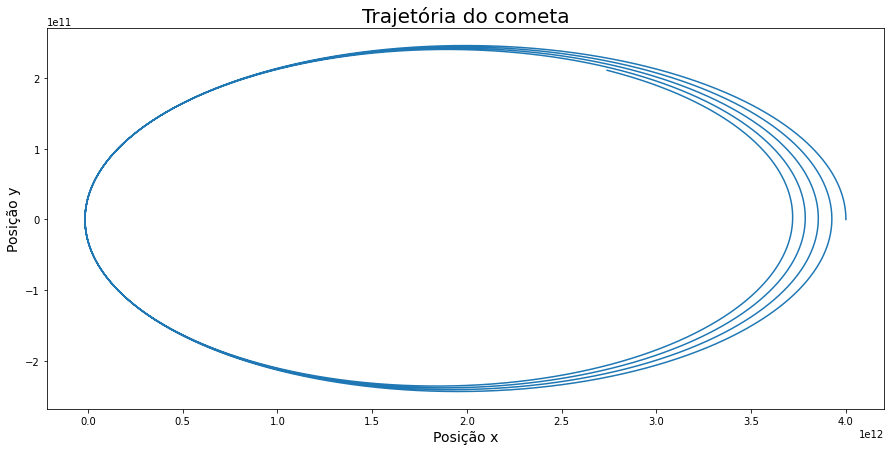

In [ ]:
figure(figsize=[15,7])
plot(traj[0],traj[1])
xlabel('Posição x', fontsize=14)
ylabel('Posição y', fontsize=14)
title('Trajetória do cometa', fontsize=20)
show()

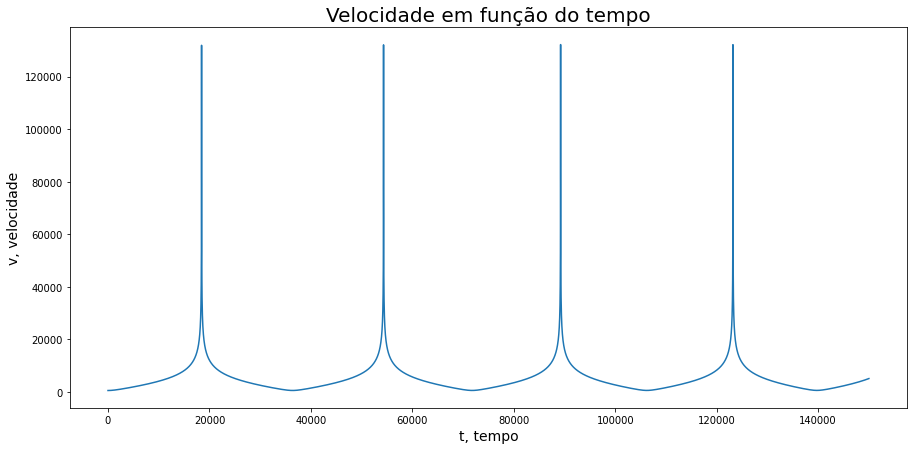

In [ ]:
vx=np.power(traj[2],2)
vy=np.power(traj[3],2)
v3=np.add(vx,vy)
v=np.sqrt(v3)
figure(figsize=[15,7])
plot(v)
xlabel('t, tempo', fontsize=14)
ylabel('v, velocidade', fontsize=14)
title('Velocidade em função do tempo', fontsize=20)
show()

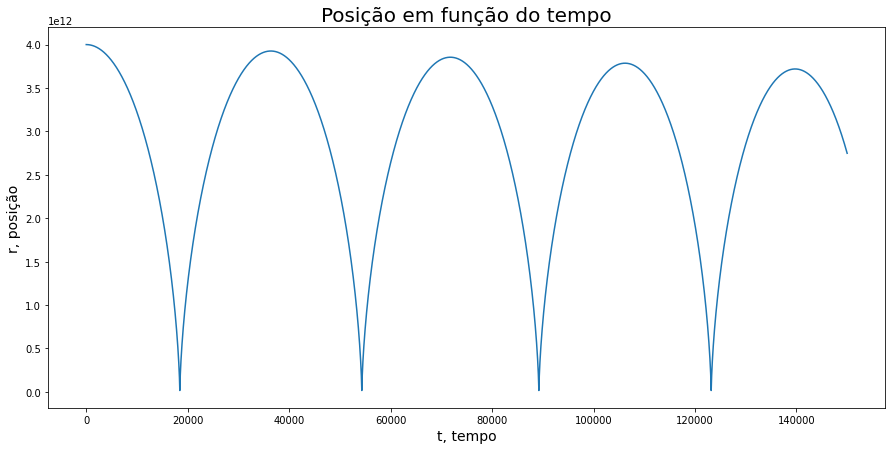

In [ ]:
x1=np.power(traj[0],2)
y1=np.power(traj[1],2)
r1=np.add(x1,y1)
r=np.sqrt(r1)
figure(figsize=[15,7])
plot(r)
xlabel('t, tempo', fontsize=14)
ylabel('r, posição', fontsize=14)
title('Posição em função do tempo', fontsize=20)
show()

## Discussão dos resultados obtidoss

A partir dos vários gráficos das trajetórias para 48, 49 e 50 anos, chegamos à conclusão que o cometa demora, aproximadamente, 49 anos a dar uma volta ao Sol.

O gráfico da posição x e y do cometa confirma o esperado: tem uma trajetória elíptica.

Com os gráficos da velocidade em função do tempo e da posição em função do tempo, observa-se que, quanto menor é o r, maior é a velocidade. Estes resultados estão de acordo com o que já se sabia: quanto mais próximos os cometas estão do Sol, maior é a sua velocidade (em módulo).